In [1]:
%matplotlib inline
import numpy as np
from keras.models import Sequential
from keras.layers.core import Dense, Activation, Dropout
from keras.optimizers import SGD
from keras import backend as K
from sklearn import datasets
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:
np.random.seed(123)

'''
データの生成
'''
mnist = datasets.fetch_mldata('MNIST original', data_home='.')

n = len(mnist.data)
N = 30000  # MNISTの一部を使う
N_train = 20000
N_validation = 4000
indices = np.random.permutation(range(n))[:N]  # ランダムにN枚を選択

X = mnist.data[indices]
y = mnist.target[indices]
Y = np.eye(10)[y.astype(int)]

X_train, X_test, Y_train, Y_test = \
    train_test_split(X, Y, test_size=N_validation)
X_train, X_validation, Y_train, Y_validation = \
    train_test_split(X_train, Y_train, test_size=N_validation)


In [3]:
'''
モデル設定
'''
n_in = len(X[0])  # 784
n_hiddens = [200, 200, 200]
n_out = len(Y[0])  # 10
p_keep = 0.5
activation = 'relu'

In [4]:
def weight_variable(shape):
    # 標準偏差0.01の切断正規分布に従う乱数を返す
    return K.truncated_normal(shape, stddev=0.01)
    # return np.random.normal(scale=0.01, size=shape)

In [5]:
model = Sequential()
for i, input_dim in enumerate(([n_in] + n_hiddens)[:-1]):
    model.add(Dense(n_hiddens[i], input_dim=input_dim,
                    kernel_initializer=weight_variable))
    model.add(Activation(activation))
    model.add(Dropout(p_keep))

model.add(Dense(n_out, kernel_initializer=weight_variable))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer=SGD(lr=0.01),
              metrics=['accuracy'])

In [6]:
'''
モデル学習
'''
epochs = 50
batch_size = 200

hist = model.fit(X_train, Y_train, epochs=epochs,
                 batch_size=batch_size,
                 validation_data=(X_validation, Y_validation))


Train on 22000 samples, validate on 4000 samples
Epoch 1/50
22000/22000 [==============================] - 2s 106us/step - loss: 2.1686 - acc: 0.1866 - val_loss: 1.5564 - val_acc: 0.5437
Epoch 2/50
22000/22000 [==============================] - 2s 78us/step - loss: 1.1072 - acc: 0.6232 - val_loss: 0.5698 - val_acc: 0.8400
Epoch 3/50
22000/22000 [==============================] - 2s 75us/step - loss: 0.6589 - acc: 0.7953 - val_loss: 0.3891 - val_acc: 0.8953
Epoch 4/50
22000/22000 [==============================] - 2s 77us/step - loss: 0.5068 - acc: 0.8479 - val_loss: 0.3094 - val_acc: 0.9130
Epoch 5/50
22000/22000 [==============================] - 2s 79us/step - loss: 0.4224 - acc: 0.8780 - val_loss: 0.2588 - val_acc: 0.9282
Epoch 6/50
22000/22000 [==============================] - 2s 76us/step - loss: 0.3643 - acc: 0.8964 - val_loss: 0.2395 - val_acc: 0.9345
Epoch 7/50
22000/22000 [==============================] - 2s 77us/step - loss: 0.3290 - acc: 0.9054 - val_loss: 0.2229 - val_acc

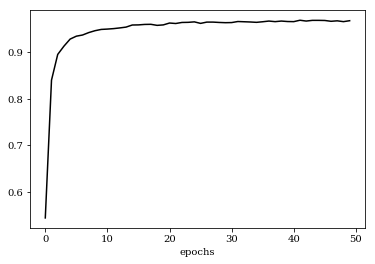

In [7]:
'''
学習の進み具合を可視化
'''
val_acc = hist.history['val_acc']
val_loss = hist.history['val_loss']

plt.rc('font', family='serif')
fig = plt.figure()
plt.plot(range(epochs), val_acc, label='acc', color='black')
plt.xlabel('epochs')
plt.show()
# plt.savefig('mnist_keras.eps')


In [8]:
'''
予測精度の評価
'''
loss_and_metrics = model.evaluate(X_test, Y_test)
print(loss_and_metrics)


4000/4000 [==============================] - 0s 64us/step
[0.11444434746610932, 0.96950000000000003]
